In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import imagehash


In [2]:
img_dir = "/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET"
img_widths = []
img_height = []
img_list = []
img_paths = [] 
for category in os.listdir(img_dir):
    if category != ".DS_Store":# and category=="tanks":
        category_dir = os.path.join(img_dir, category)
        for img_id in os.listdir(category_dir):
            #print(category_dir+'/'+img_id)
            if img_id == ".DS_Store" :
                continue
            img_path = category_dir+'/'+img_id
            #print(img_path)
            img = Image.open(img_path)
            img_paths.append(img_path)
            img_list.append(img)

dhash_list = [imagehash.dhash(img) for img in img_list]


In [3]:
import random
# Set seed
random.seed(42)  # You can use any integer as the seed value
img_index = random.randint(0, len(img_list))
recommend_img = {}
for i, dhash in enumerate(dhash_list):
    recommend_img[f"{i}"]=((dhash_list[img_index]-dhash))
sorted_recommend = dict(sorted(recommend_img.items(), key=lambda item: item[1]))
print(img_paths[img_index],sorted_recommend)

/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_sweaters/img_7831318.jpg {'2619': 0, '54': 4, '775': 5, '1349': 5, '1496': 5, '2273': 5, '7': 6, '332': 6, '467': 6, '722': 6, '1271': 6, '1330': 6, '1352': 6, '1573': 6, '1596': 6, '1659': 6, '1666': 6, '1730': 6, '1858': 6, '1860': 6, '1957': 6, '2002': 6, '2310': 6, '2542': 6, '93': 7, '95': 7, '361': 7, '479': 7, '635': 7, '854': 7, '1095': 7, '1303': 7, '1355': 7, '1381': 7, '1457': 7, '1510': 7, '1558': 7, '1721': 7, '1990': 7, '2011': 7, '2178': 7, '2280': 7, '2330': 7, '2384': 7, '2525': 7, '379': 8, '445': 8, '466': 8, '675': 8, '701': 8, '757': 8, '805': 8, '1289': 8, '1294': 8, '1528': 8, '1760': 8, '1824': 8, '1866': 8, '1868': 8, '1877': 8, '1879': 8, '1899': 8, '1914': 8, '1927': 8, '1972': 8, '2009': 8, '2014': 8, '2054': 8, '2184': 8, '2442': 8, '2466': 8, '2681': 8, '94': 9, '140': 9, '154': 9, '254': 9, '294': 9, '318': 9, '351': 9, '562': 9, '575': 9, '597': 9, '610': 9, '680': 9, '752': 9, '755': 9, '7

In [8]:
result = []
for key, value in list(sorted_recommend.items()):
    if value == 0:
        continue
    result.append(key)
    if len(result) == 10:
        break


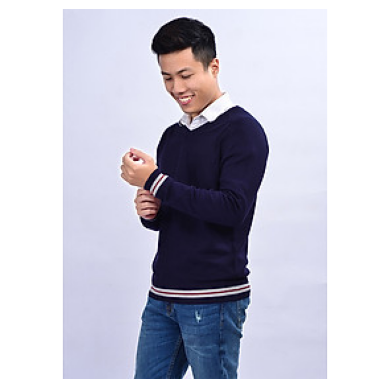

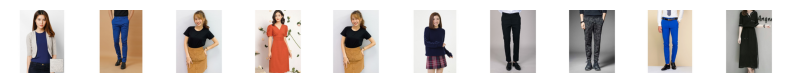

In [9]:
plt.imshow(img_list[img_index])
plt.axis('off')  # Hide axis
plt.show()

fig, axs = plt.subplots(1, len(result), figsize=(8, 12))

for i, ax in  enumerate(axs):
    axs[i].imshow(img_list[int(result[i])])
    axs[i].axis('off')
    
plt.tight_layout()
plt.show()

In [10]:
print(img_paths[img_index])

/space/hotel/hieud/mlflow_aisia/image/AISIA_BOUTIQUE_DATASET/men_sweaters/img_7831318.jpg


In [ ]:
import torch
from tqdm import tqdm 
import pandas as pd
def convert_img2feat(model, data_pd):
    #data_pd = pd.read_csv('/space/hotel/hieud/mlflow_aisia/img.csv')

    latent_dict = {} 
    for i in tqdm(range(len(data_pd))):
        row = data_pd.iloc[i]
        image = cv2.imread(row['img_path'])
        image_tensor = torch.tensor(image,  dtype=torch.float32)
        image_tensor = image_tensor.permute(2, 0, 1)
        image_tensor = image_tensor.unsqueeze(0)
        with torch.no_grad():
            # x =
            x = torch.squeeze(model(image_tensor).cpu())
            latent_feature = x.tolist()
        latent_dict[row['img_path']] = latent_feature

    with open(f'/space/hotel/hieud/mlflow_aisia/latent_features_deep_learning.json', 'w') as json_file:
        json.dump(latent_dict, json_file)